#  Importing and Preprocessing data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'D:\\training\\data science\\researching\\modeling'

In [4]:
df=pd.read_csv('bank datasets.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [5]:
df_copy=df.copy(deep=True)

In [6]:
df_copy.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df_copy.shape

(10000, 14)

In [9]:
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
pd.isnull(df_copy).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df_copy.duplicated().sum()

0

### transforming Geography to numerical column

In [13]:
df_copy.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
int_Geography=[]
for i in df_copy['Geography']:
    if i=="France":
        int_Geography.append(1)
    elif i=="Germany":
        int_Geography.append(2)
    else :
        int_Geography.append(3)
df_copy['int_Geography']=int_Geography
df_copy=df_copy.drop(['Geography'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,2


### transforming Gender to numerical column

In [15]:
int_Gender=[]
for i in df_copy['Gender']:
    if i=="Female":
        int_Gender.append(1)
    elif i=="Male":
        int_Gender.append(2)

df_copy['int_Gender']=int_Gender
df_copy=df_copy.drop(['Gender'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,2
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,2
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,2,2


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  int_Geography    10000 non-null  int64  
 13  int_Gender       10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [17]:
df_copy.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [18]:
df_copy=df_copy.drop(['RowNumber','CustomerId'],axis=1)

### correlation between data columns

In [19]:
df_copy.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.007888,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.022812,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003739,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.069408,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.003972,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.008523,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.006724,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.001369,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.035943,-0.106512
int_Geography,0.007888,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,1.000000,0.004719


## visualization

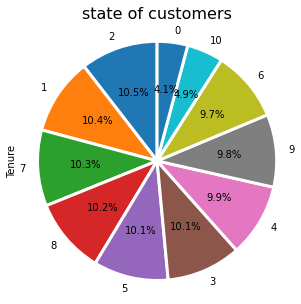

<Figure size 864x432 with 0 Axes>

In [20]:
x=df_copy['Tenure'].value_counts()
x.plot.pie(figsize=(5, 5),autopct='%1.1f%%',startangle=90, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},radius=1.1)
plt.title('state of customers',fontsize=16)
plt.figure(figsize =(12, 6))
plt.show()

so the state of the customers is one of 1,2,3,...,10 years. if tenure of a customer is grater than 5 months then he/she is loyal, else isn't loyal. 

In [21]:
target_Lable_remainstatue=[]
for i in df_copy['Tenure']:
    if i>=5:
        target_Lable_remainstatue.append(1)
    else :
        target_Lable_remainstatue.append(0)

df_copy['target_Lable_remainstatue']=target_Lable_remainstatue


df_copy

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender,target_Lable_remainstatue
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3,1,0
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1,1
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,2,1
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,2,1
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1,1
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,2,2,0


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surname                    10000 non-null  object 
 1   CreditScore                10000 non-null  int64  
 2   Age                        10000 non-null  int64  
 3   Tenure                     10000 non-null  int64  
 4   Balance                    10000 non-null  float64
 5   NumOfProducts              10000 non-null  int64  
 6   HasCrCard                  10000 non-null  int64  
 7   IsActiveMember             10000 non-null  int64  
 8   EstimatedSalary            10000 non-null  float64
 9   Exited                     10000 non-null  int64  
 10  int_Geography              10000 non-null  int64  
 11  int_Gender                 10000 non-null  int64  
 12  target_Lable_remainstatue  10000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usag

In [25]:
df_copy['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

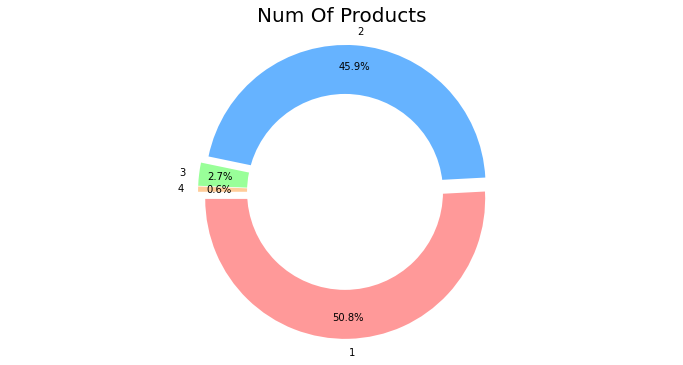

In [70]:
fig, axs = plt.subplots(figsize=(12,6))
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
sizes = [df_copy.NumOfProducts[df_copy['NumOfProducts']==1].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==2].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==3].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==4].count()]
axs.pie(sizes,labels=['1', '2','3','4'],explode=(0.05,0.05,0.05,0.05) , autopct='%1.1f%%',pctdistance=0.85,colors=colors, startangle=180 )
center_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
axs.axis('equal')
plt.title("Num Of Products", size = 20)
#plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

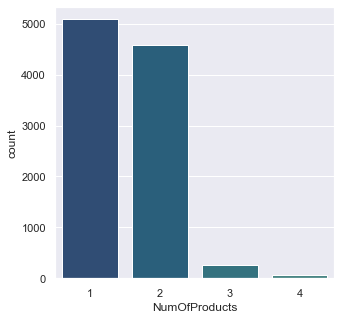

In [86]:
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})
fig,axs = plt.subplots(1,1)
sns.set_theme(palette="crest_r")
sns.countplot( x = "NumOfProducts",data = df_copy )


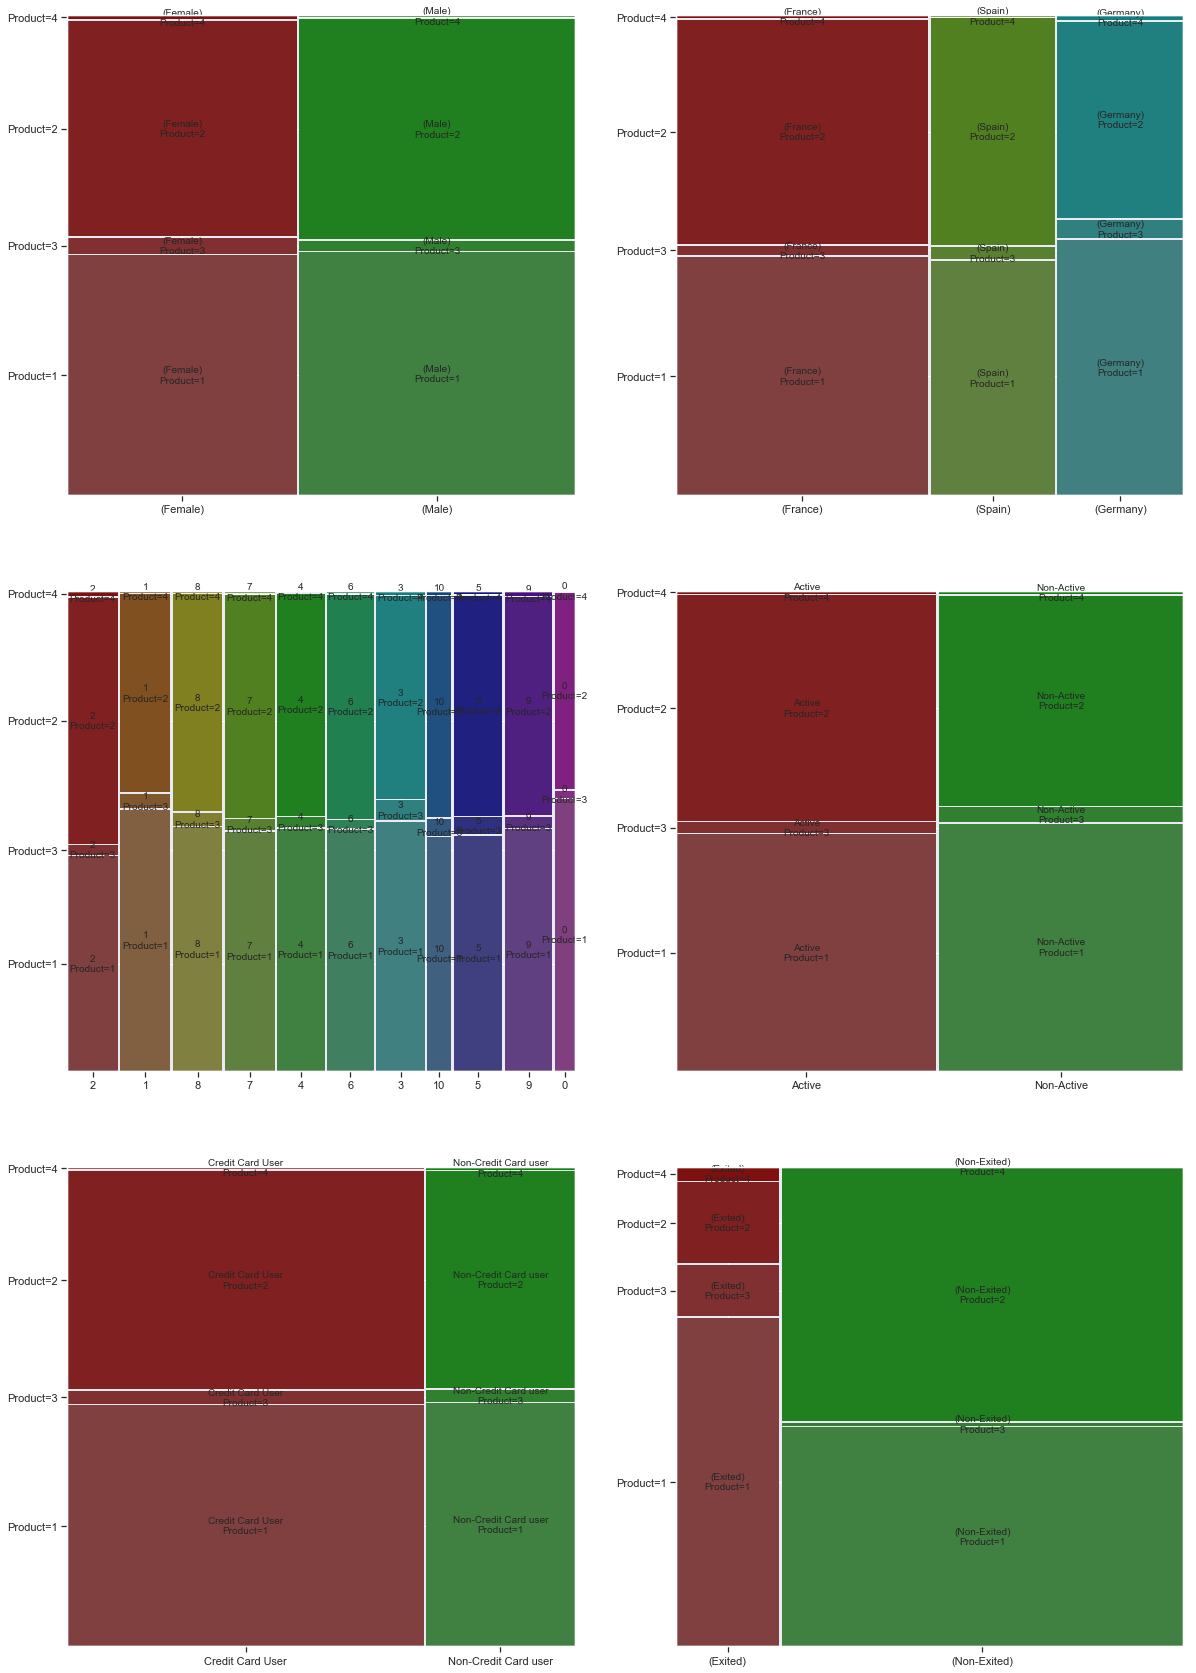

In [100]:
from statsmodels.graphics.mosaicplot import mosaic

sns.set(rc = {'figure.figsize':(20,30)})
sns.set_theme(palette="crest_r")
fig,axs = plt.subplots(3,2)
cd =  df_copy.copy(deep=True)
cd['Exited'] = np.where(cd['Exited']==1,"(Exited)","(Non-Exited)")
cd['int_Gender'] = np.where(cd['int_Gender']==1,"(Female)","(Male)")
cd['int_Geography'] = np.where(cd['int_Geography']==1,"(France)",(np.where(cd['int_Geography']==2,"(Germany)","(Spain)")))
cd['IsActiveMember'] = np.where(cd['IsActiveMember']==1,"Active","Non-Active")
cd['HasCrCard'] = np.where(cd['HasCrCard']==1,"Credit Card User","Non-Credit Card user")
cd['NumOfProducts'] = np.where(cd['NumOfProducts']==1,"Product=1",
                               (np.where(cd['NumOfProducts']==2,"Product=2",
                                         (np.where(cd['NumOfProducts']==3,"Product=3","Product=4")))))
mosaic(cd,['int_Gender','NumOfProducts'],ax=axs[0,0])
mosaic(cd,['int_Geography','NumOfProducts'],ax=axs[0,1])
mosaic(cd,['Tenure','NumOfProducts'],ax=axs[1,0])
mosaic(cd,['IsActiveMember','NumOfProducts'],ax=axs[1,1])
mosaic(cd,['HasCrCard','NumOfProducts'],ax=axs[2,0])
mosaic(cd,['Exited','NumOfProducts'],ax=axs[2,1])
plt.show()